In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Read the file

application = pd.read_csv('application_data.csv')
prev = pd.read_csv('previous_application.csv')

In [4]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Checking the no. of rows and columns

application.shape

(307511, 122)

In [6]:
# Check the column-wise info of the dataframe
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
application.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
application.drop(application.iloc[:,44:91],axis = 1,inplace = True)
application.drop(['OWN_CAR_AGE','EXT_SOURCE_1'],axis = 1,inplace = True)

### Since all the above removed columns had the missing values above 50% so it is more feasible to drop these columns

In [9]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
application.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 73, dtype: int64

In [11]:
# Checking the document columns
documents = application[application.columns[49:69]]
documents

,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
307507,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
307508,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0
307509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0


In [12]:
documents.FLAG_DOCUMENT_14.value_counts()

0    306608
1       903
Name: FLAG_DOCUMENT_14, dtype: int64

In [13]:
# Dropping the document columns
application.drop(application.iloc[:,49:69],axis = 1,inplace = True)

### Since the document columns have most of the values as 0 which represents that the documents were not provided so it is ideal to drop them

In [14]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0,1,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0,1,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0,0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,0,1,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0,0,0.0,0.0,0.0,0.0


In [15]:
application.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [16]:
application.AMT_GOODS_PRICE.isnull().sum()

278

## Dealing with columns which have 13% or less missing  values

In [17]:
goods = application.AMT_GOODS_PRICE.mode()[0]
application.AMT_GOODS_PRICE.fillna(goods,inplace =True)

#### Since the percentage of missing data is less than 1% we can replace these values with the mode i.e the value with the highest count

In [18]:
application.AMT_ANNUITY.isnull().sum()

12

In [19]:
annuity = application.AMT_ANNUITY.mode()[0]
application.AMT_ANNUITY.fillna(annuity,inplace =True)

#### Since the percentage of missing data is less than 1% we can replace these values with the mode i.e the value with the highest count

In [20]:
application.NAME_TYPE_SUITE .isnull().sum()

1292

In [21]:
suite = application.NAME_TYPE_SUITE.mode()[0]
application.NAME_TYPE_SUITE.fillna(suite,inplace =True)

#### Since the percentage of missing data is less than 1% we can replace these values with the mode i.e the value with the highest count

In [22]:
inp0 = application[-application.CNT_FAM_MEMBERS.isnull()].copy()
inp1 = inp0[-inp0.DAYS_LAST_PHONE_CHANGE.isnull()].copy()

#### Since the percentage of missing data is less than 0.1% we can drop these values .

In [23]:
inp1.EXT_SOURCE_2.isnull().sum()

659

#### Since the missing percentage of data is very low and the columns is not very important in terms of the analysis we are goin to drop the column.

In [24]:
inp1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0,1,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0,1,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0,0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,0,1,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0,0,0.0,0.0,0.0,0.0


In [25]:
inp1.drop(inp1.iloc[:,21:27],axis = 1,inplace = True)

In [26]:
inp1.drop(inp1.iloc[:,23:33],axis = 1,inplace = True)

In [27]:
inp1.drop(inp1.iloc[:,26:],axis =1 ,inplace =True)

In [28]:
inp1.drop(inp1.iloc[:,-2:],axis =1 ,inplace =True)

In [29]:
inp1.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OCCUPATION_TYPE               96390
CNT_FAM_MEMBERS                   0
ORGANIZATION_TYPE                 0
dtype: int64

In [30]:
inp1.OCCUPATION_TYPE.value_counts(normalize = True)

Laborers                 0.261399
Sales staff              0.152057
Core staff               0.130590
Managers                 0.101223
Drivers                  0.088117
High skill tech staff    0.053904
Accountants              0.046476
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [31]:
inp1.OCCUPATION_TYPE.fillna("Missing",inplace =True)

### We replace the missing value with 'Missing' as we need this column of analysis and around 31% is null in this column .Since this is a categorical column we create a new category for the missing value as Missing.

In [32]:
inp1.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
ORGANIZATION_TYPE             0
dtype: int64

In [33]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307508 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307508 non-null  int64  
 1   TARGET                      307508 non-null  int64  
 2   NAME_CONTRACT_TYPE          307508 non-null  object 
 3   CODE_GENDER                 307508 non-null  object 
 4   FLAG_OWN_CAR                307508 non-null  object 
 5   FLAG_OWN_REALTY             307508 non-null  object 
 6   CNT_CHILDREN                307508 non-null  int64  
 7   AMT_INCOME_TOTAL            307508 non-null  float64
 8   AMT_CREDIT                  307508 non-null  float64
 9   AMT_ANNUITY                 307508 non-null  float64
 10  AMT_GOODS_PRICE             307508 non-null  float64
 11  NAME_TYPE_SUITE             307508 non-null  object 
 12  NAME_INCOME_TYPE            307508 non-null  object 
 13  NAME_EDUCATION

In [34]:
inp1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS
count,307508.000000,307508.00000,307508.000000,3.075080e+05,3.075080e+05,307508.000000,3.075080e+05,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000,307508.000000
mean,278181.332947,0.08073,0.417056,1.687970e+05,5.990268e+05,27107.842585,5.383178e+05,0.020868,-16037.041560,63815.673956,-4986.137584,-2994.208382,2.152666
std,102789.982905,0.27242,0.722124,2.371237e+05,4.024923e+05,14493.961026,3.692904e+05,0.013831,4363.980429,141276.312548,3522.896819,1509.449226,0.910683
min,100002.000000,0.00000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.000000
25%,189146.750000,0.00000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7480.000000,-4299.000000,2.000000
50%,278202.500000,0.00000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1214.000000,-4504.000000,-3254.000000,2.000000
75%,367143.250000,0.00000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,3.000000
max,456255.000000,1.00000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,20.000000


## Checking for Outliers

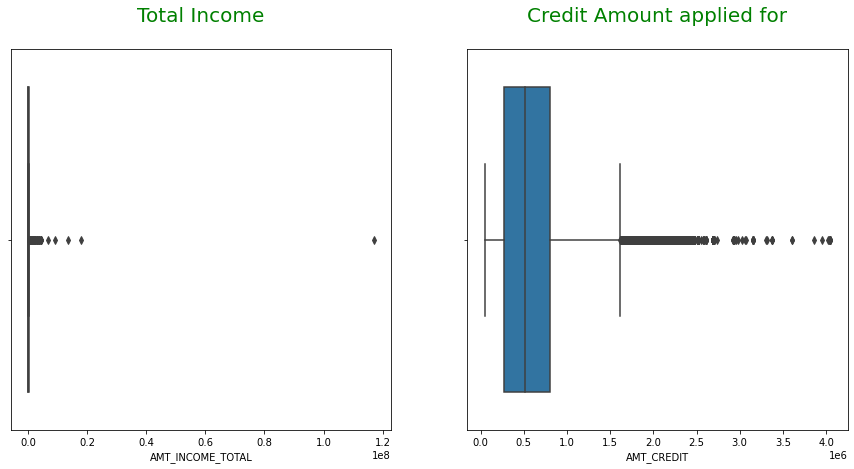

In [35]:
plt.figure(figsize= [15,7])
plt.subplot(1,2,1)
sns.boxplot(inp1.AMT_INCOME_TOTAL)
plt.title("Total Income\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
sns.boxplot(inp1.AMT_CREDIT)
plt.title("Credit Amount applied for\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

### Checking for data imbalance in the Total income column as it is observed from the above boxplot that there are some unncessary data presnt in them.

In [36]:
inp1[inp1.AMT_INCOME_TOTAL>5000000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,Married,House / apartment,0.010643,-12615,-922,-6762.0,-3643,Laborers,3.0,Business Entity Type 3
77768,190160,0,Cash loans,F,Y,N,0,9000000.0,1431531.0,132601.5,...,Civil marriage,House / apartment,0.010147,-16425,-8476,-7276.0,-1656,Managers,2.0,Business Entity Type 1
131127,252084,0,Cash loans,M,Y,N,0,6750000.0,790830.0,52978.5,...,Married,House / apartment,0.009549,-19341,-443,-7414.0,-2886,Laborers,2.0,Transport: type 4
203693,336147,0,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,...,Married,House / apartment,0.030755,-15704,-4961,-3338.0,-4728,Missing,4.0,Business Entity Type 3
246858,385674,0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,...,Married,House / apartment,0.030755,-13551,-280,-3953.0,-4972,Missing,2.0,Business Entity Type 3


In [37]:
# We drop those rows with imbalance in them
inp1.drop([12840,203693,246858,77768,131127],inplace =True)

### Since these values are outliers we remove these values.

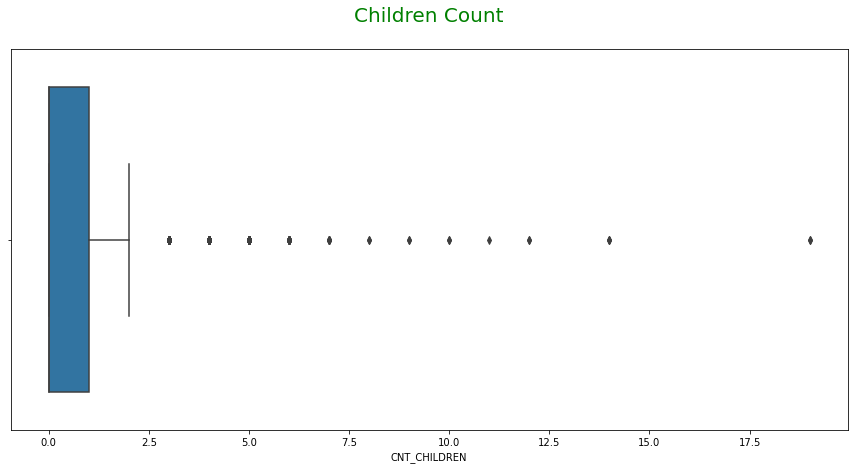

In [38]:
plt.figure(figsize= [15,7])
sns.boxplot(inp1.CNT_CHILDREN)
plt.title("Children Count\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

In [39]:
inp1.CNT_CHILDREN.value_counts()

0     215365
1      61118
2      26748
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

### The data shows some people with 8 and above children count which looks suspicious. So the possible approach is to remove these data.

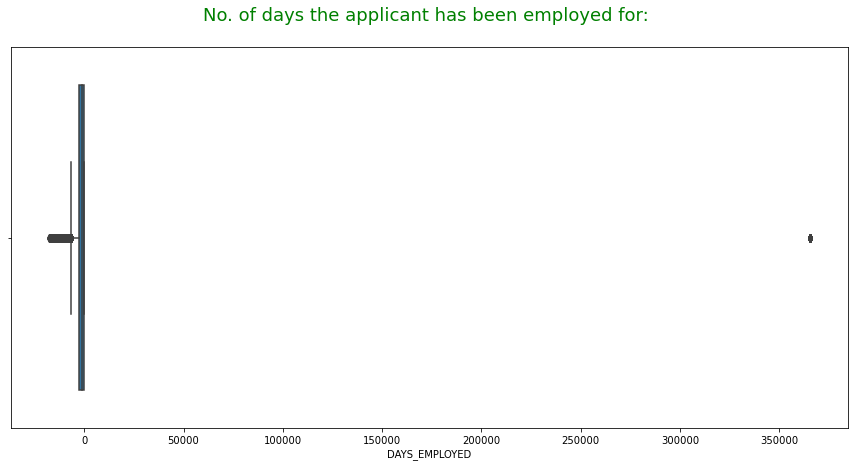

In [40]:
plt.figure(figsize =[15,7])
sns.boxplot(inp1.DAYS_EMPLOYED)
plt.title("No. of days the applicant has been employed for: \n", fontdict={'fontsize': 18, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

In [41]:
inp1.DAYS_EMPLOYED.value_counts()

 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-11866         1
-9817          1
-13659         1
-9561          1
-16314         1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

### Since from the data it shows a huge number of people have worked for around 1000years which is not practically possible so the best approach is to not use the above said column in analysis.

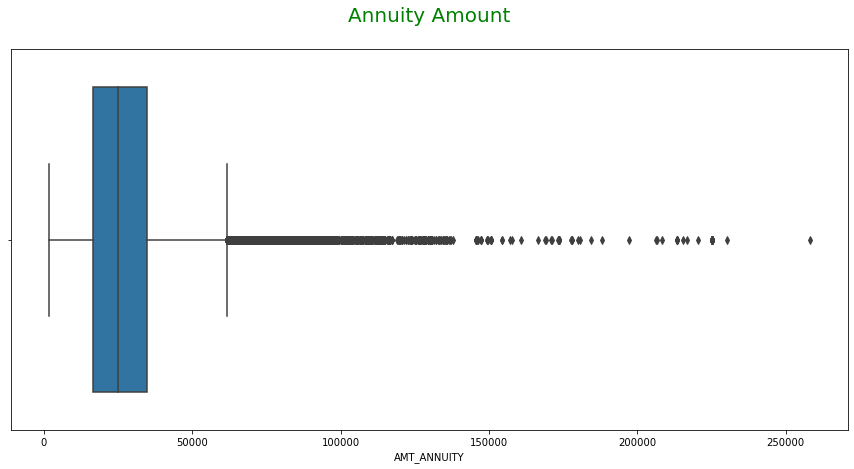

In [42]:
plt.figure(figsize =[15,7])
sns.boxplot(inp1.AMT_ANNUITY)
plt.title("Annuity Amount\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

In [43]:
inp1.AMT_ANNUITY.value_counts()

9000.0     6397
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
82516.5       1
41778.0       1
41242.5       1
91674.0       1
42115.5       1
Name: AMT_ANNUITY, Length: 13670, dtype: int64

In [44]:
inp1[inp1.AMT_ANNUITY>120000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
2513,102931,0,Cash loans,F,Y,Y,1,292500.0,1409719.5,135936.0,...,Married,House / apartment,0.046220,-13928,-6099,-7991.0,-3163,Missing,3.0,Other
8959,110426,0,Cash loans,F,N,Y,0,427500.0,2428200.0,123480.0,...,Single / not married,House / apartment,0.072508,-22816,365243,-5231.0,-5208,Missing,1.0,XNA
11212,113064,0,Cash loans,M,N,Y,0,405000.0,1327500.0,126045.0,...,Civil marriage,House / apartment,0.035792,-12963,-4240,-6993.0,-1328,Missing,2.0,Business Entity Type 3
11505,113404,0,Cash loans,M,N,N,0,405000.0,1377351.0,130779.0,...,Married,House / apartment,0.035792,-18267,-2045,-538.0,-1805,Managers,2.0,Business Entity Type 3
12108,114122,0,Revolving loans,M,Y,Y,0,1080000.0,2250000.0,225000.0,...,Married,House / apartment,0.072508,-15323,-6281,-2788.0,-4430,Managers,2.0,Bank
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295705,442594,0,Cash loans,M,Y,N,1,585000.0,2356920.0,122040.0,...,Married,House / apartment,0.002506,-13169,-5602,-271.0,-4217,Managers,3.0,Military
300022,447572,0,Cash loans,M,Y,Y,0,450000.0,1800000.0,173704.5,...,Married,House / apartment,0.028663,-23397,-6255,-8486.0,-4846,Missing,2.0,Other
300051,447608,0,Cash loans,F,N,N,1,315000.0,1350000.0,128182.5,...,Married,House / apartment,0.028663,-14937,-5103,-4277.0,-4425,Missing,3.0,Industry: type 2
301712,449536,0,Cash loans,F,Y,N,1,427500.0,2339100.0,216589.5,...,Married,House / apartment,0.018850,-13926,-6743,-280.0,-4426,Medicine staff,3.0,Medicine


In [45]:
inp1.AMT_ANNUITY.dtype

dtype('float64')

## Binning

### Converting the days_birth to age as it more convinent to use for analysis.

In [46]:
inp1['AGE'] = abs(inp1.DAYS_BIRTH/365)
inp1['AGE'] = inp1['AGE'].round().astype('int64')
inp1.drop('DAYS_BIRTH',axis = 1,inplace= True)

In [47]:
# create bins for Total income range
bins = [0, 100000, 200000, 300000, 400000, 500000]
bucket_l = ['0-100000', '100000-200000', '200000-300000', '300000-400000','400000+']
inp1['Income_Range'] = pd.cut(inp1['AMT_INCOME_TOTAL'], bins, labels=bucket_l)

In [48]:
# create bins for Age group 
bins = [20, 30, 40, 50, 60,70]
bucket_2 = ['20-30', '30-40', '40-50', '50-60','60+']
inp1['Age_Grp'] = pd.cut(inp1['AGE'], bins, labels=bucket_2)

In [49]:
# create bins for Total income range
bins = [0, 100000, 200000, 300000, 400000, 500000]
bucket_3 = ['0-100000', '100000-200000', '200000-300000', '300000-400000','400000+']
inp1['Credit_Range'] = pd.cut(inp1['AMT_CREDIT'], bins, labels=bucket_3)


In [50]:
inp1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AGE,Income_Range,Age_Grp,Credit_Range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-637,-3648.0,-2120,Laborers,1.0,Business Entity Type 3,26,200000-300000,20-30,400000+
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-1188,-1186.0,-291,Core staff,2.0,School,46,200000-300000,40-50,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-225,-4260.0,-2531,Laborers,1.0,Government,52,0-100000,50-60,100000-200000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-3039,-9833.0,-2437,Laborers,2.0,Business Entity Type 3,52,100000-200000,50-60,300000-400000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3038,-4311.0,-3458,Core staff,1.0,Religion,55,100000-200000,50-60,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,-236,-8456.0,-1982,Sales staff,1.0,Services,26,100000-200000,20-30,200000-300000
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,365243,-4388.0,-4090,Missing,1.0,XNA,57,0-100000,50-60,200000-300000
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,-7921,-6737.0,-5150,Managers,1.0,School,41,100000-200000,40-50,NaN
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,-4786,-2562.0,-931,Laborers,2.0,Business Entity Type 1,33,100000-200000,30-40,300000-400000


In [51]:
inp1.TARGET.value_counts(normalize=True)

0    0.919272
1    0.080728
Name: TARGET, dtype: float64

In [52]:
Non_Def =inp1[inp1.TARGET == 0]
Def = inp1[inp1.TARGET == 1]

In [53]:
Non_Def.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AGE,Income_Range,Age_Grp,Credit_Range
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-1188,-1186.0,-291,Core staff,2.0,School,46,200000-300000,40-50,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-225,-4260.0,-2531,Laborers,1.0,Government,52,0-100000,50-60,100000-200000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-3039,-9833.0,-2437,Laborers,2.0,Business Entity Type 3,52,100000-200000,50-60,300000-400000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3038,-4311.0,-3458,Core staff,1.0,Religion,55,100000-200000,50-60,NaN
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,-1588,-4970.0,-477,Laborers,2.0,Other,46,0-100000,40-50,400000+


## Univariate Analysis

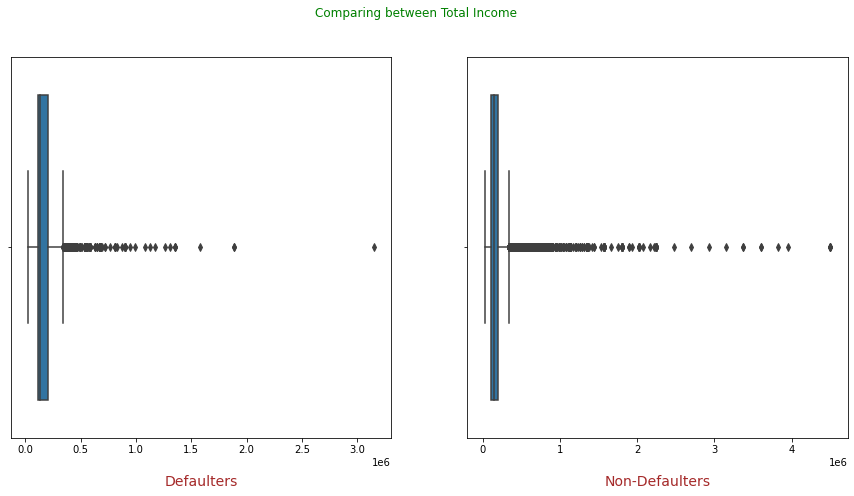

In [98]:
plt.figure(figsize= [15,7]).suptitle('Comparing between Total Income',fontdict={'fontsize': 60, 'color' : 'Green'})
plt.title('Comparing between Total Income',fontdict={'fontsize': 50,'fontweight' : 10, 'color' : 'Green'})
plt.subplot(1,2,1)
sns.boxplot(Def.AMT_INCOME_TOTAL)
plt.xlabel("\nDefaulters", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(1,2,2)
sns.boxplot(Non_Def.AMT_INCOME_TOTAL)
plt.xlabel("\nNon-Defaulters", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

### Insights 
1. Defaulters have  some outliers like more than 30lakh income.  2. Non-Defaulters have outliers , but it’s gradually increasing. 3. Still this  analysis is not enough to come to a conclusion.


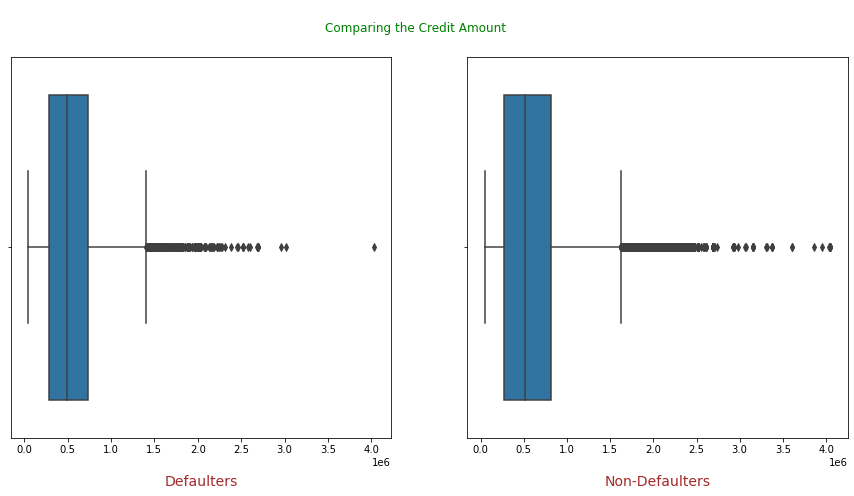

In [55]:
plt.figure(figsize= [15,7])
plt.suptitle('\nComparing the Credit Amount',fontdict={'fontsize': 20,'fontweight' : 10, 'color' : 'Green'})
plt.subplot(1,2,1)
sns.boxplot(Def.AMT_CREDIT)
plt.xlabel("\nDefaulters", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(1,2,2)
sns.boxplot(Non_Def.AMT_CREDIT)
plt.xlabel("\nNon-Defaulters", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

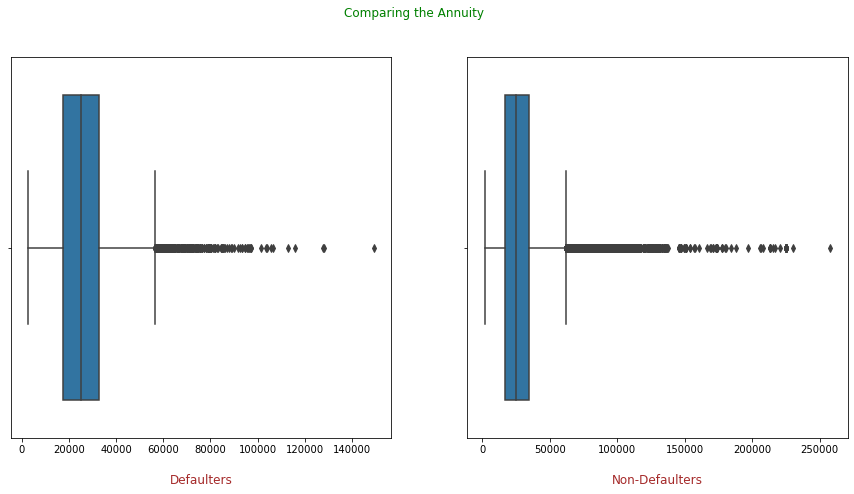

In [56]:
plt.figure(figsize= [15,7])
plt.suptitle('Comparing the Annuity ',fontdict={'fontsize': 20,'fontweight' : 10, 'color' : 'Green'})
plt.subplot(1,2,1)
sns.boxplot(Def.AMT_ANNUITY)
plt.xlabel("\nDefaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(1,2,2)
sns.boxplot(Non_Def.AMT_ANNUITY)
plt.xlabel("\nNon-Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

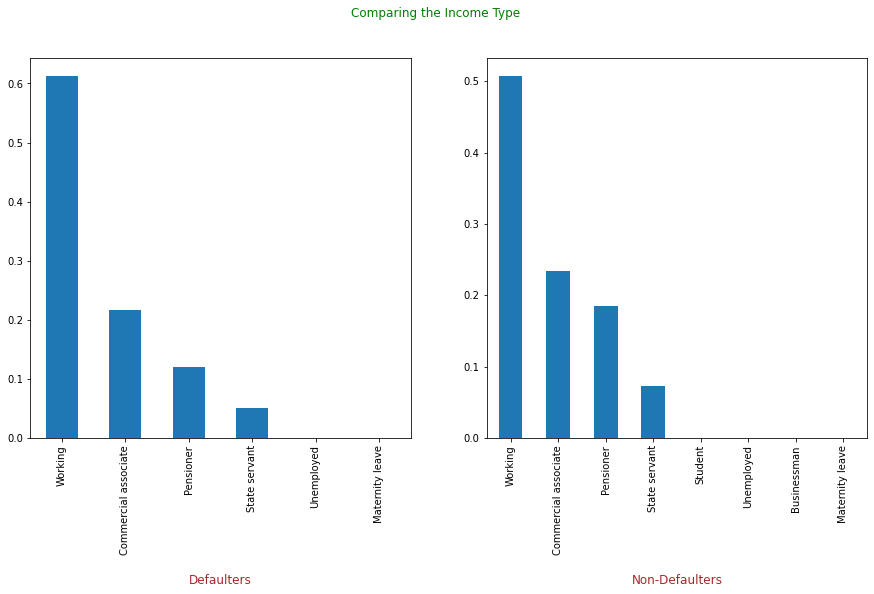

In [57]:
plt.figure(figsize= [15,7])
plt.suptitle('Comparing the Income Type',fontdict={'fontsize': 20,'fontweight' : 10, 'color' : 'Green'})
plt.subplot(1,2,1)
Def.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.xlabel("\nDefaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(1,2,2)
Non_Def.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.xlabel("\nNon-Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

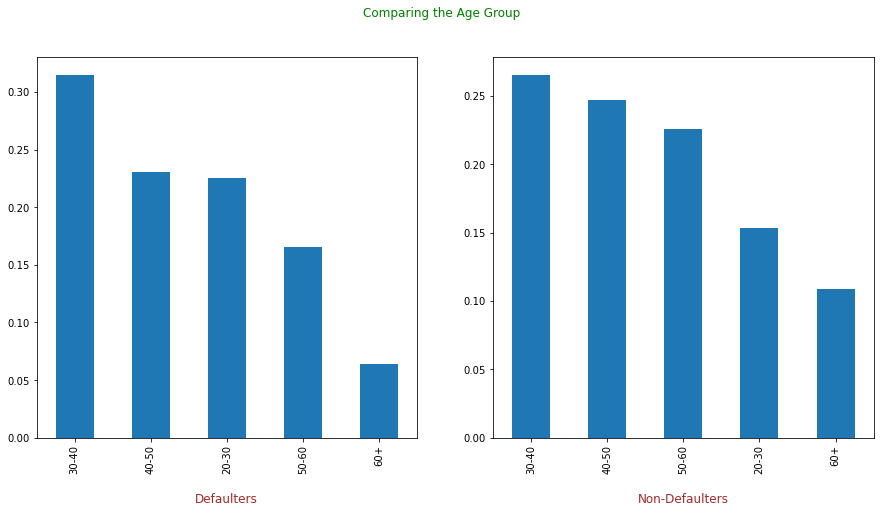

In [58]:
plt.figure(figsize= [15,7])
plt.suptitle('Comparing the Age Group',fontdict={'fontsize': 20,'fontweight' : 10, 'color' : 'Green'})
plt.subplot(1,2,1)
Def.Age_Grp.value_counts(normalize=True).plot.bar()
plt.xlabel("\nDefaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(1,2,2)
Non_Def.Age_Grp.value_counts(normalize=True).plot.bar()
plt.xlabel("\nNon-Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

### Insights 
1. Defaulters dataset shows more no. of defaulters fall in 30-40 age group. 2. Non-Defaulters dataset shows more no. of non-defaulters fall in age group 30-40 and 40-50. 3. This shows 30-40 age group have applied more for loan and we have to keep an eye on this age group as it has more than 30% defaulters.


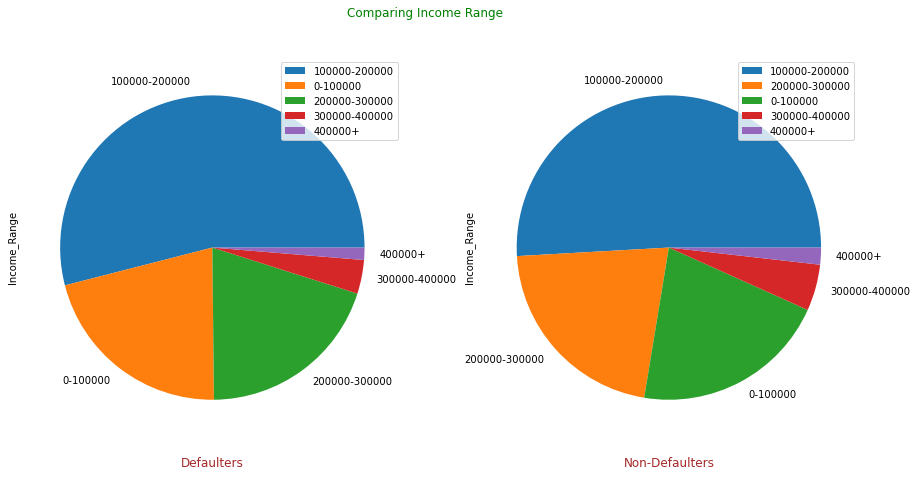

In [59]:
plt.figure(figsize= [15,7])
plt.suptitle('Comparing Income Range ',fontdict={'fontsize': 20,'fontweight' : 10, 'color' : 'Green'})
plt.subplot(1,2,1)
Def.Income_Range.value_counts(normalize=True).plot.pie()
plt.xlabel("\nDefaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.legend()

plt.subplot(1,2,2)
Non_Def.Income_Range.value_counts(normalize=True).plot.pie()
plt.xlabel("\nNon-Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.legend()
plt.show()

## Bivariate Analysis

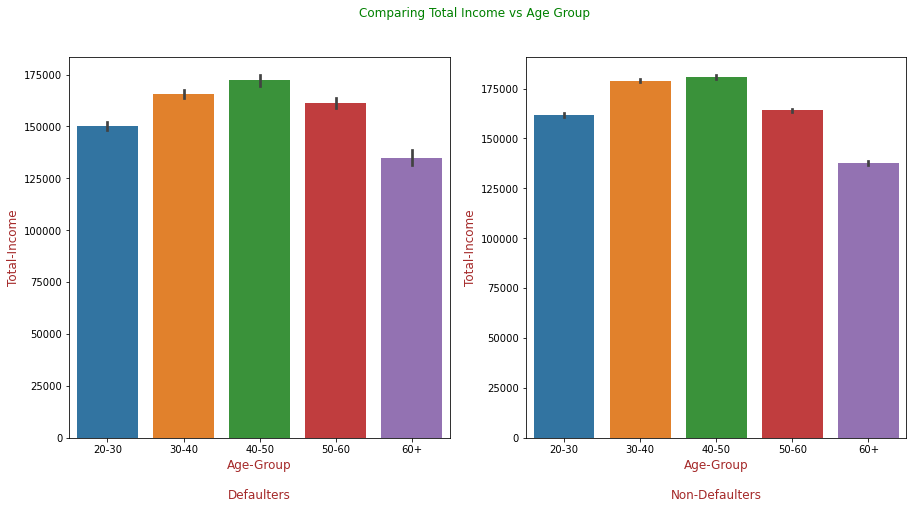

In [60]:
plt.figure(figsize= [15,7])
plt.suptitle('Comparing Total Income vs Age Group',fontdict={'fontsize': 20,'fontweight' : 10, 'color' : 'Green'})
plt.subplot(1,2,1)
sns.barplot(data=Def, x="Age_Grp", y="AMT_INCOME_TOTAL")
plt.xlabel("Age-Group\n\nDefaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Total-Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(1,2,2)
sns.barplot(data=Non_Def, x="Age_Grp", y="AMT_INCOME_TOTAL")
plt.xlabel("Age-Group\n\nNon-Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Total-Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

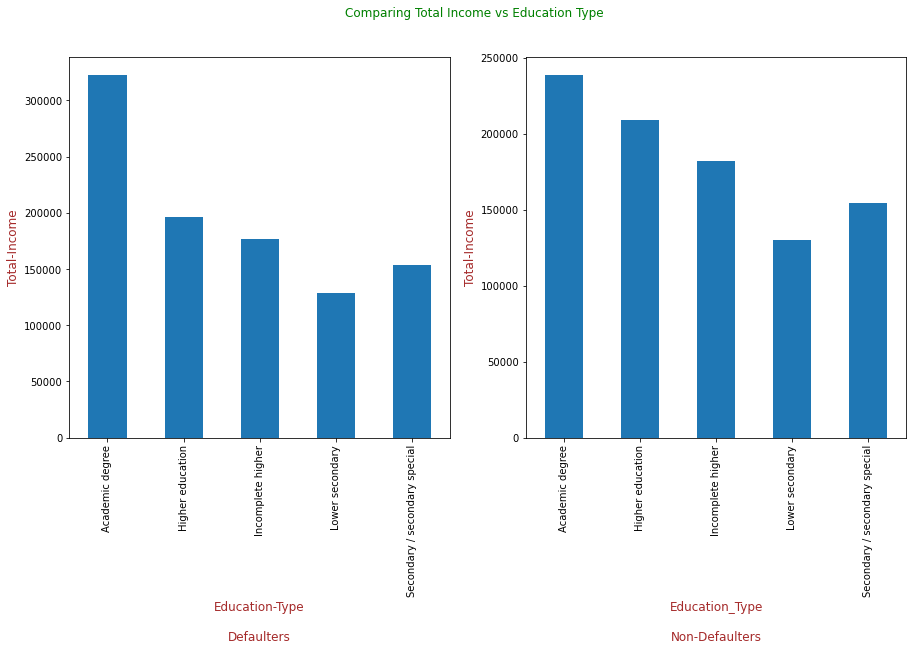

In [61]:
plt.figure(figsize= [15,7])
plt.suptitle('Comparing Total Income vs Education Type',fontdict={'fontsize': 20,'fontweight' : 10, 'color' : 'Green'})
plt.subplot(1,2,1)
Def.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].mean().plot.bar()
plt.xlabel("Education-Type\n\nDefaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Total-Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(1,2,2)
Non_Def.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].mean().plot.bar()
plt.xlabel("Education_Type\n\nNon-Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Total-Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

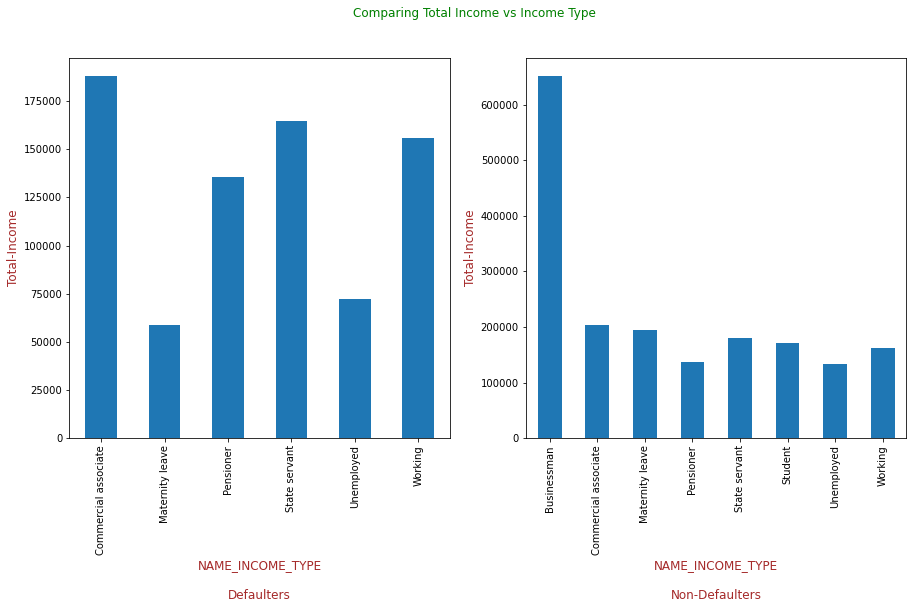

In [62]:
plt.figure(figsize= [15,7])
plt.suptitle('Comparing Total Income vs Income Type',fontdict={'fontsize': 20,'fontweight' : 10, 'color' : 'Green'})
plt.subplot(1,2,1)
Def.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].mean().plot.bar()
plt.xlabel("NAME_INCOME_TYPE\n\nDefaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Total-Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(1,2,2)
Non_Def.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].mean().plot.bar()
plt.xlabel("NAME_INCOME_TYPE\n\nNon-Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Total-Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

### Insights 
1- it can be observed in Defaulters that the Commercial Associate working class with high income  have a application of loans 
2-In the Non- defaulters graph Businessmen have applied for the the loans more.
3-So we can keep these two working class in check while approving the loans 

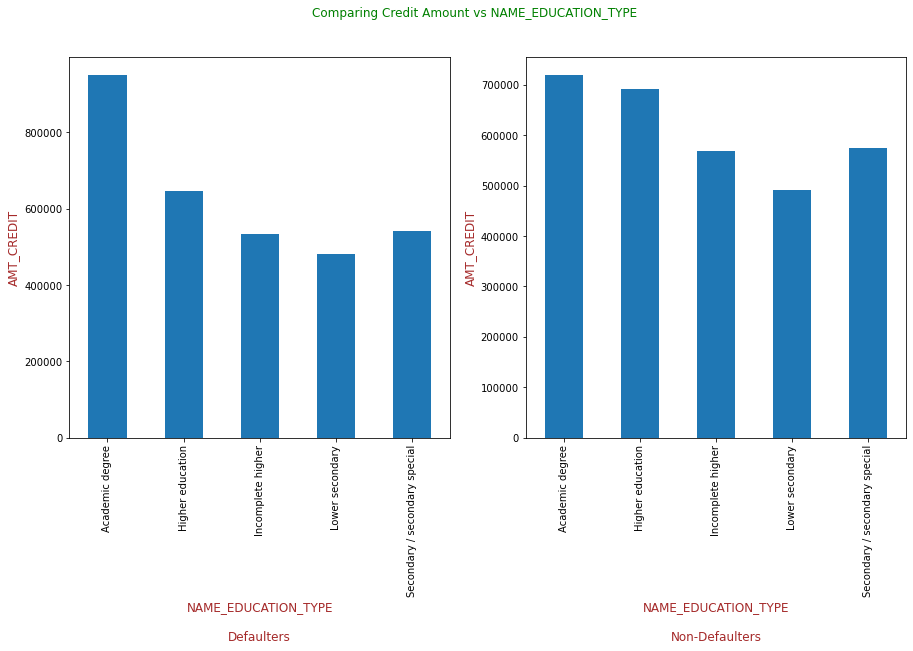

In [99]:
plt.figure(figsize= [15,7])
plt.suptitle('Comparing Credit Amount vs NAME_EDUCATION_TYPE',fontdict={'fontsize': 20,'fontweight' : 10, 'color' : 'Green'})
plt.subplot(1,2,1)
Def.groupby('NAME_EDUCATION_TYPE')['AMT_CREDIT'].mean().plot.bar()
plt.xlabel("NAME_EDUCATION_TYPE\n\nDefaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("AMT_CREDIT", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(1,2,2)
Non_Def.groupby('NAME_EDUCATION_TYPE')['AMT_CREDIT'].mean().plot.bar()
plt.xlabel("NAME_EDUCATION_TYPE\n\nNon-Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("AMT_CREDIT", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

### Insights -  
1 - Defaulters have applicants from people with an acedemic degree and also have applied for a high Credit amount . Those people need to be checked 

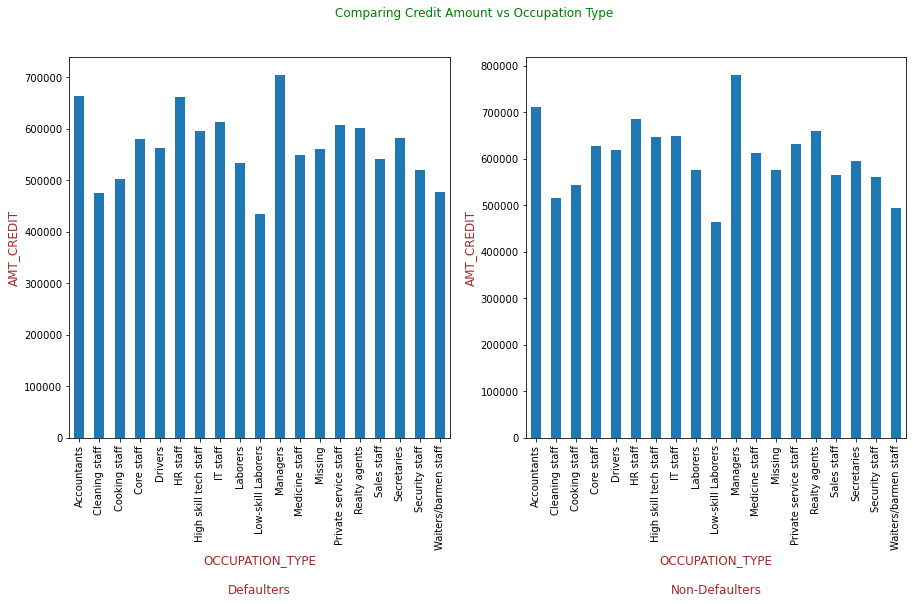

In [90]:
plt.figure(figsize= [15,7])
plt.suptitle('Comparing Credit Amount vs Occupation Type',fontdict={'fontsize': 20,'fontweight' : 10, 'color' : 'Green'})
plt.subplot(1,2,1)
Def.groupby('OCCUPATION_TYPE')['AMT_CREDIT'].mean().plot.bar()
plt.xlabel("OCCUPATION_TYPE\n\nDefaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("AMT_CREDIT", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(1,2,2)
Non_Def.groupby('OCCUPATION_TYPE')['AMT_CREDIT'].mean().plot.bar()
plt.xlabel("OCCUPATION_TYPE\n\nNon-Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("AMT_CREDIT", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

### Insights -
In Defaulters dataset , applicants with job profiles like Accountats, Managers and HR staffs have applied for a high Credit amount . Those people need to be checked.

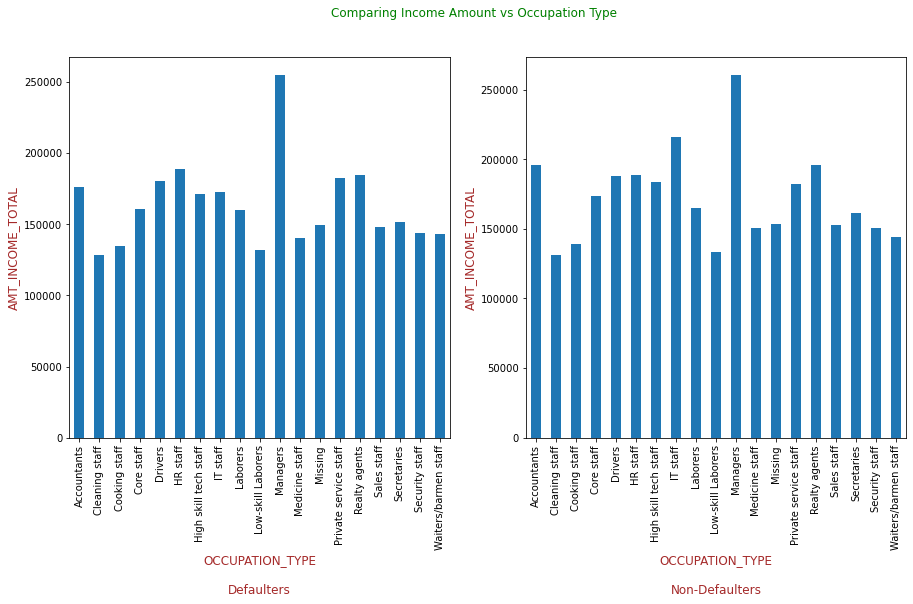

In [95]:
plt.figure(figsize= [15,7])
plt.suptitle('Comparing Income Amount vs Occupation Type',fontdict={'fontsize': 20,'fontweight' : 10, 'color' : 'Green'})
plt.subplot(1,2,1)
Def.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].mean().plot.bar()
plt.xlabel("OCCUPATION_TYPE\n\nDefaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("AMT_INCOME_TOTAL", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(1,2,2)
Non_Def.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].mean().plot.bar()
plt.xlabel("OCCUPATION_TYPE\n\nNon-Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("AMT_INCOME_TOTAL", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

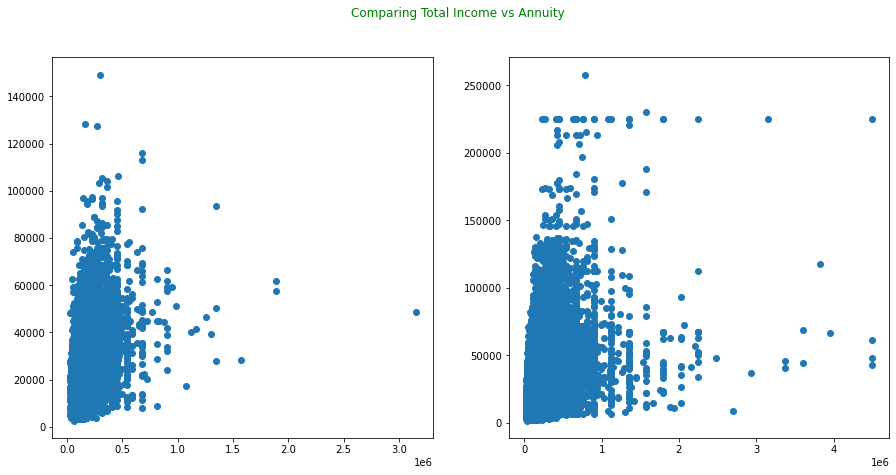

In [64]:
plt.figure(figsize= [15,7])
plt.suptitle('Comparing Total Income vs Annuity',fontdict={'fontsize': 20,'fontweight' : 10, 'color' : 'Green'})
plt.subplot(1,2,1)
plt.scatter(Def.AMT_INCOME_TOTAL,Def.AMT_ANNUITY)

plt.subplot(1,2,2)
plt.scatter(Non_Def.AMT_INCOME_TOTAL,Non_Def.AMT_ANNUITY)
plt.show()

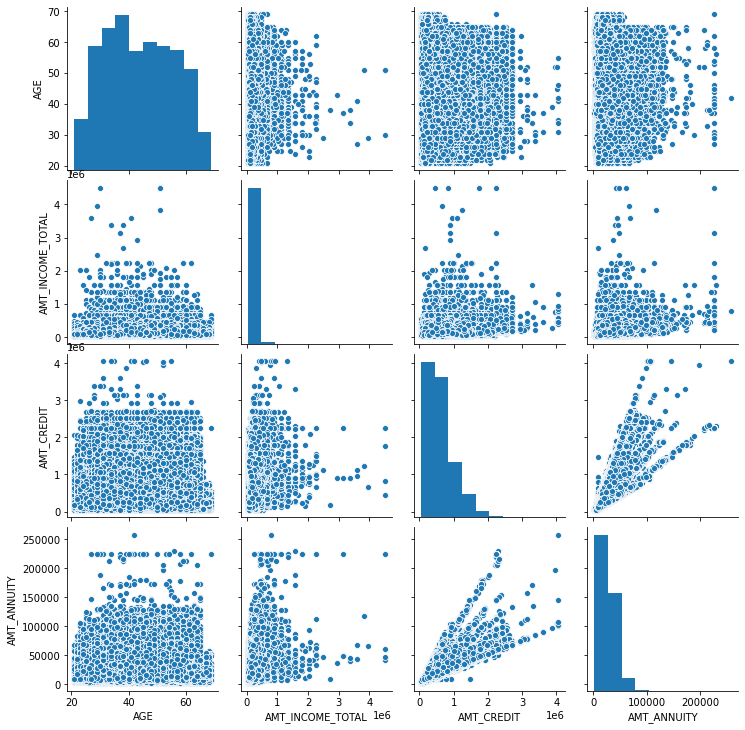

In [88]:
sns.pairplot(inp1[['AGE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']])
plt.show()

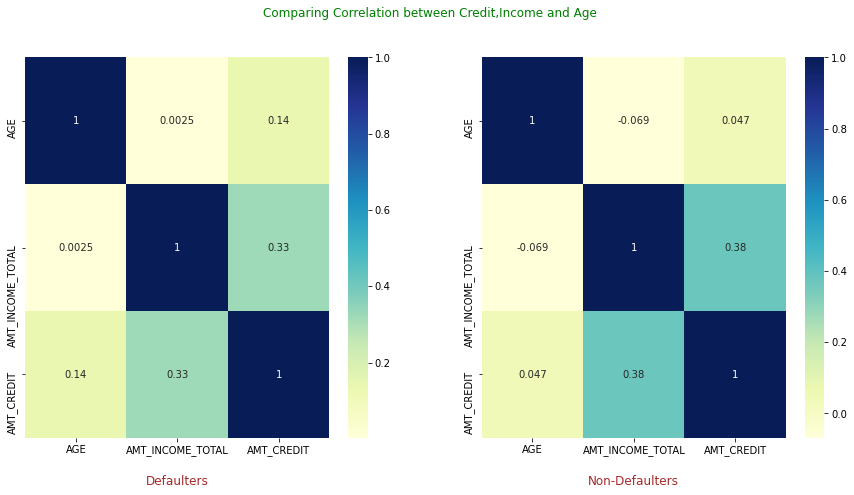

In [65]:
plt.figure(figsize= [15,7])
plt.suptitle('Comparing Correlation between Credit,Income and Age',fontdict={'fontsize': 20,'fontweight' : 10, 'color' : 'Green'})
plt.subplot(1,2,1)
sns.heatmap(Def[['AGE','AMT_INCOME_TOTAL','AMT_CREDIT']].corr(),annot = True,cmap='YlGnBu')
plt.xlabel("\nDefaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})


plt.subplot(1,2,2)
sns.heatmap(Non_Def[['AGE','AMT_INCOME_TOTAL','AMT_CREDIT']].corr(),annot = True,cmap='YlGnBu')
plt.xlabel("\nNon-Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

### Insights::
In Defaulters dataset, shows positive correlation.
In Non-defaulter dataset, shows negative correlation between age and amount income.


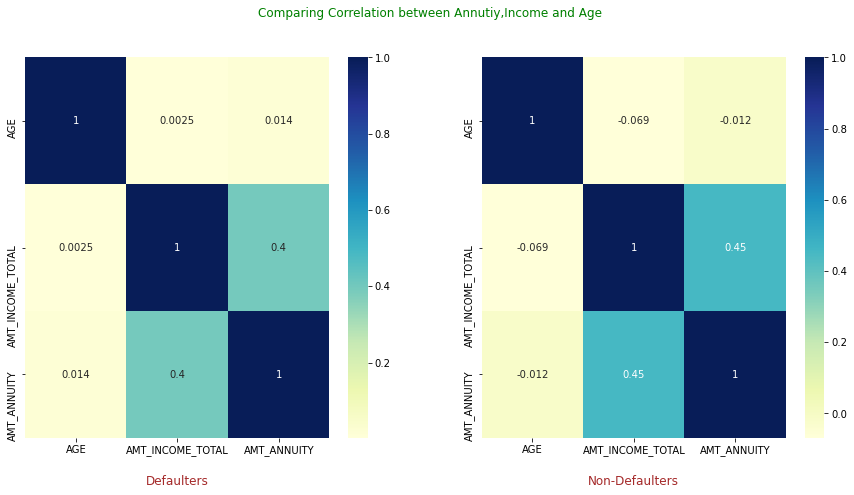

In [66]:
plt.figure(figsize= [15,7])
plt.suptitle('Comparing Correlation between Annutiy,Income and Age',fontdict={'fontsize': 20,'fontweight' : 10, 'color': 'Green'}) 
plt.subplot(1,2,1)
sns.heatmap(Def[['AGE','AMT_INCOME_TOTAL','AMT_ANNUITY']].corr(),annot = True,cmap='YlGnBu')
plt.xlabel("\nDefaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(1,2,2)
sns.heatmap(Non_Def[['AGE','AMT_INCOME_TOTAL','AMT_ANNUITY']].corr(),annot = True,cmap='YlGnBu')
plt.xlabel("\nNon-Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

### Insights::
In Defaulters dataset, shows positive correlation.
In Non-defaulter dataset, shows negative correlation between age and amount income and amount annuity.



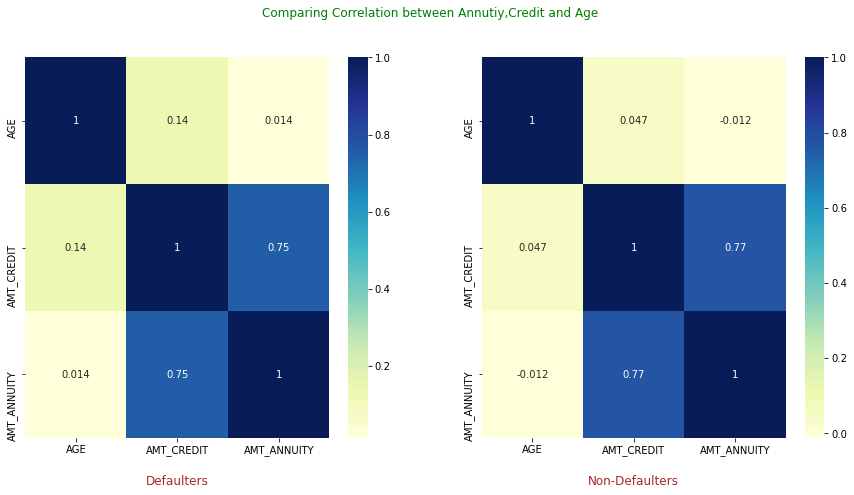

In [67]:
plt.figure(figsize= [15,7])
plt.suptitle('Comparing Correlation between Annutiy,Credit and Age',fontdict={'fontsize': 20,'fontweight' : 10, 'color': 'Green'})
plt.subplot(1,2,1)
sns.heatmap(Def[['AGE','AMT_CREDIT','AMT_ANNUITY']].corr(),annot = True,cmap='YlGnBu')
plt.xlabel("\nDefaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(1,2,2)
sns.heatmap(Non_Def[['AGE','AMT_CREDIT','AMT_ANNUITY']].corr(),annot = True,cmap='YlGnBu')
plt.xlabel("\nNon-Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

### Insights::
In Defaulters dataset, amount credit and amount annuity shows strong correlation.
In Non-defaulter dataset, there is negative correlation between age and amount annuity.


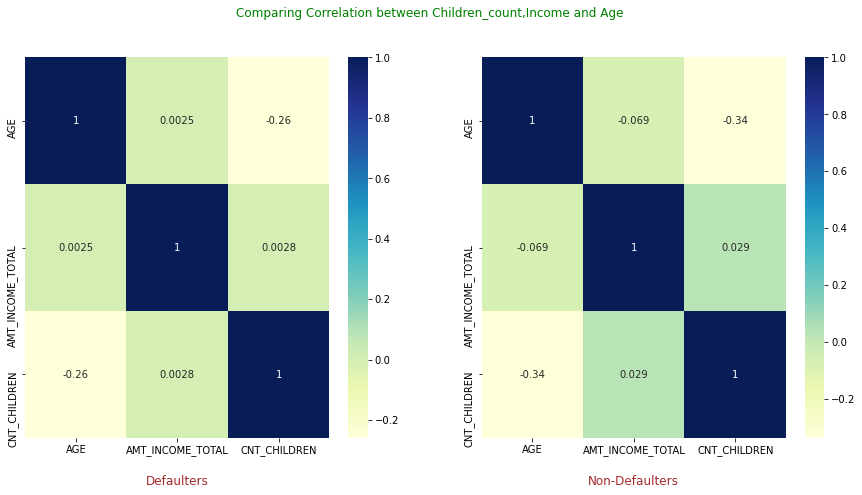

In [68]:
plt.figure(figsize= [15,7])
plt.suptitle('Comparing Correlation between Children_count,Income and Age',fontdict={'fontsize': 20,'fontweight' : 10, 'color': 'Green'})
plt.subplot(1,2,1)
sns.heatmap(Def[['AGE','AMT_INCOME_TOTAL','CNT_CHILDREN']].corr(),annot = True,cmap='YlGnBu')
plt.xlabel("\nDefaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(1,2,2)
sns.heatmap(Non_Def[['AGE','AMT_INCOME_TOTAL','CNT_CHILDREN']].corr(),annot = True,cmap='YlGnBu')
plt.xlabel("\nNon-Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

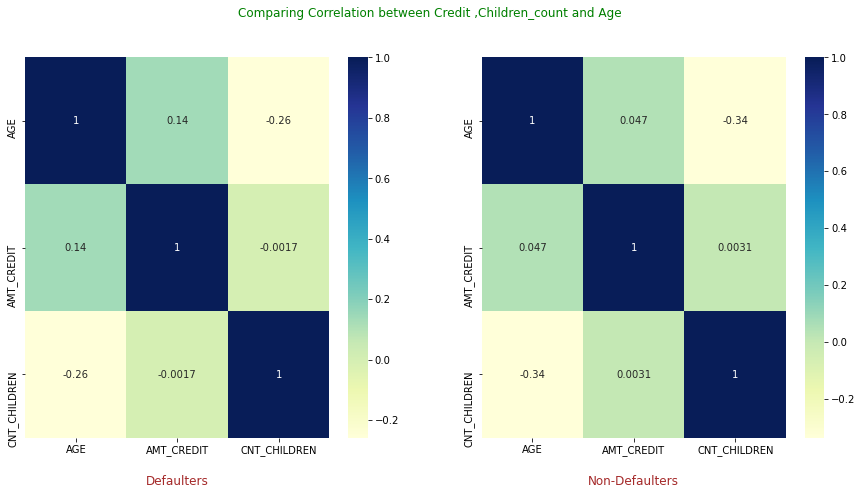

In [69]:
plt.figure(figsize= [15,7])
plt.suptitle('Comparing Correlation between Credit ,Children_count and Age',fontdict={'fontsize': 20,'fontweight' : 10, 'color': 'Green'})
plt.subplot(1,2,1)
sns.heatmap(Def[['AGE','AMT_CREDIT','CNT_CHILDREN']].corr(),annot = True,cmap='YlGnBu')
plt.xlabel("\nDefaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.subplot(1,2,2)
sns.heatmap(Non_Def[['AGE','AMT_CREDIT','CNT_CHILDREN']].corr(),annot = True,cmap='YlGnBu')
plt.xlabel("\nNon-Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

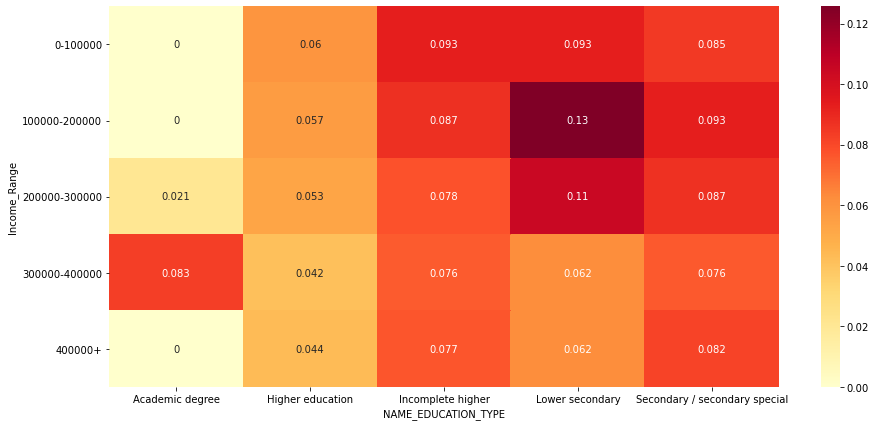

In [70]:
#create the heat map of Income vs Education vs Target.
res1 = pd.pivot_table(data= inp1,index='Income_Range',columns='NAME_EDUCATION_TYPE',values= 'TARGET')
plt.figure(figsize= [15,7])
sns.heatmap(res1,annot= True,cmap='YlOrRd')
plt.show()

### Insights::
Applicants with Lower secondary education and income range of 100000-200000 are more likely to default.


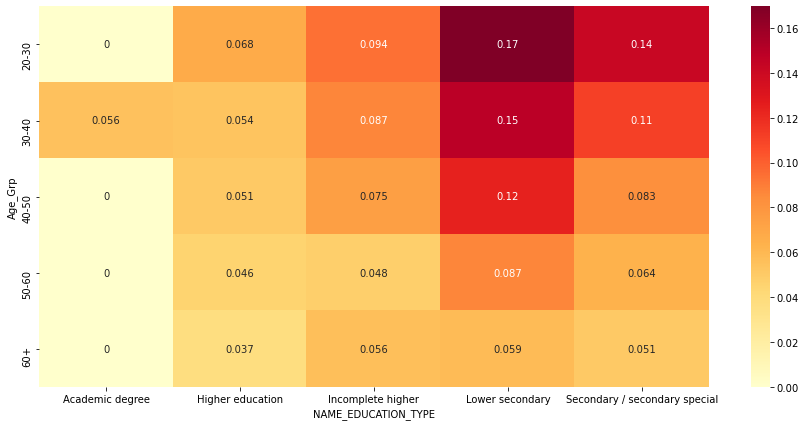

In [96]:
#create the heat map of Age grp vs Education vs Target.
fin1 = pd.pivot_table(data= inp1,index='Age_Grp',columns='NAME_EDUCATION_TYPE',values= 'TARGET')
plt.figure(figsize= [15,7])
sns.heatmap(fin1,annot= True,cmap='YlOrRd')
plt.show()

### Insights::
Applicants with Lower secondary education and Age group of 20-30, 30-40 and 40-50 are more likely to default.
Similarly, Secondary/secondary special  education and Age group of 20-30 and  30-40 are more likely to default.



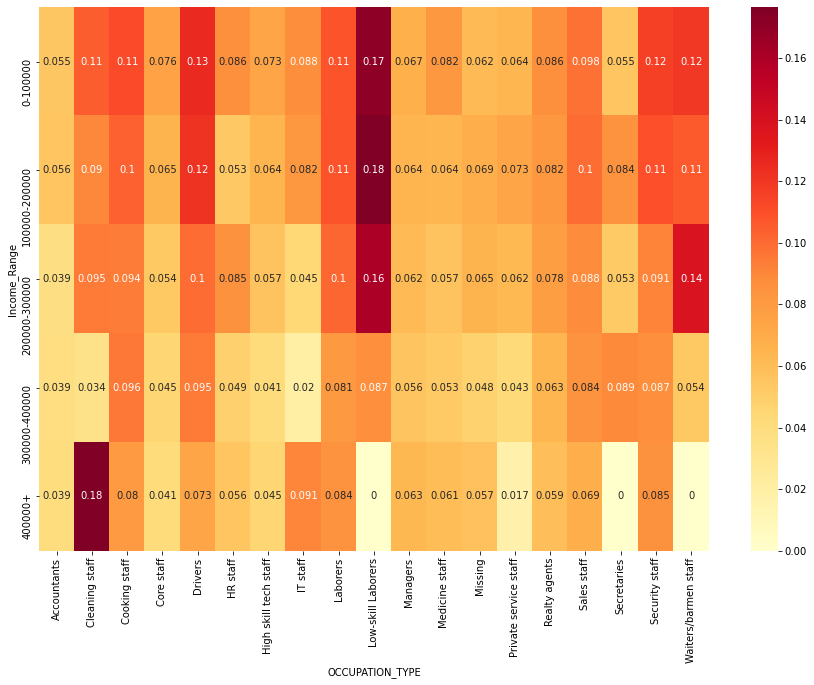

In [100]:
#create the heat map of Income vs OCCUPATION_TYPE vs Target.
plt.figure(figsize =[15,10])
res1 = pd.pivot_table(data= inp1,index='Income_Range',columns='OCCUPATION_TYPE',values= 'TARGET')
sns.heatmap(res1,annot= True,cmap='YlOrRd')
plt.show()

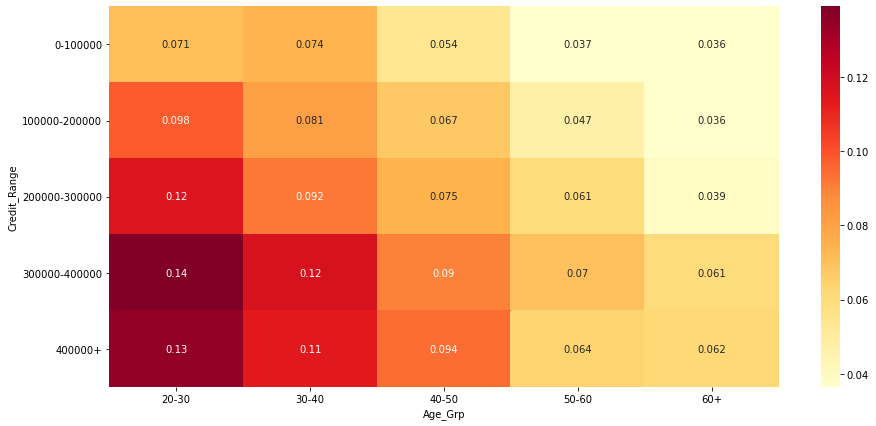

In [73]:
#create the heat map of Credit vs Age vs Target.
plt.figure(figsize =[15,7])
res1 = pd.pivot_table(data= inp1,index='Credit_Range',columns='Age_Grp',values= 'TARGET')
sns.heatmap(res1,annot= True,cmap='YlOrRd')
plt.show()

### Insights::
Applicants in the age group of 20-30 and credit range of 300000-400000 and more than 400000 are more likely to default.
Applicants in the age group 0f 60+ and credit range of 100000-200000 are good to go.



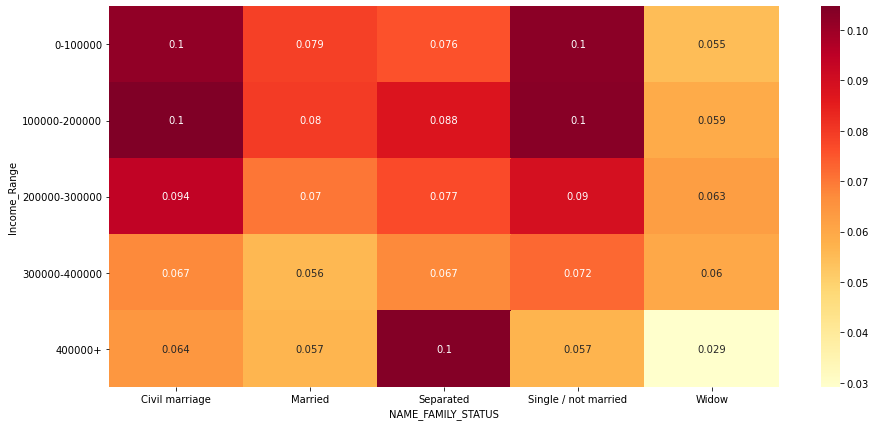

In [101]:
#create the heat map of Income vs NAME_FAMILY_STATUS vs Target.
res1 = pd.pivot_table(data= inp1,index='Income_Range',columns='NAME_FAMILY_STATUS',values= 'TARGET')
plt.figure(figsize= [15,7])
sns.heatmap(res1,annot= True,cmap='YlOrRd')
plt.show()

In [75]:
prev1 = prev[['SK_ID_CURR','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE']]

In [76]:
prev1

,SK_ID_CURR,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE
0,271877,Approved,Cash through the bank,Repeater
1,108129,Approved,XNA,Repeater
2,122040,Approved,Cash through the bank,Repeater
3,176158,Approved,Cash through the bank,Repeater
4,202054,Refused,Cash through the bank,Repeater
...,...,...,...,...
1670209,352015,Approved,Cash through the bank,Refreshed
1670210,334635,Approved,Cash through the bank,New
1670211,249544,Approved,Cash through the bank,Repeater
1670212,400317,Approved,Cash through the bank,Repeater


In [77]:
prev1['Approved'] = prev1['NAME_CONTRACT_STATUS'].apply(lambda x: 1 if  x =='Approved' else 0)
prev1['Refused'] = prev1['NAME_CONTRACT_STATUS'].apply(lambda x: 1 if  x =='Refused' else 0)
prev1['Cancelled'] = prev1['NAME_CONTRACT_STATUS'].apply(lambda x: 1 if  x =='Canceled' else 0)
prev1['Unused_offer'] = prev1['NAME_CONTRACT_STATUS'].apply(lambda x: 1 if  x =='Unused offer' else 0)
prev1['Total_Count'] = prev1['Approved']+prev1['Refused']+prev1['Cancelled']+prev1['Unused_offer']

In [78]:
prev2 = prev1.groupby("SK_ID_CURR").sum()

In [79]:
result = pd.merge(inp1, prev2, on='SK_ID_CURR')


In [80]:
result.shape

(291053, 32)

In [81]:
result.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    0
ORGANIZATION_TYPE                  0
AGE                                0
Income_Range                    2129
Age_Grp                            0
Credit_Range                  148383
A

In [82]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291053 entries, 0 to 291052
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  291053 non-null  int64   
 1   TARGET                      291053 non-null  int64   
 2   NAME_CONTRACT_TYPE          291053 non-null  object  
 3   CODE_GENDER                 291053 non-null  object  
 4   FLAG_OWN_CAR                291053 non-null  object  
 5   FLAG_OWN_REALTY             291053 non-null  object  
 6   CNT_CHILDREN                291053 non-null  int64   
 7   AMT_INCOME_TOTAL            291053 non-null  float64 
 8   AMT_CREDIT                  291053 non-null  float64 
 9   AMT_ANNUITY                 291053 non-null  float64 
 10  AMT_GOODS_PRICE             291053 non-null  float64 
 11  NAME_TYPE_SUITE             291053 non-null  object  
 12  NAME_INCOME_TYPE            291053 non-null  object  
 13 

In [83]:
result.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,AGE,Income_Range,Age_Grp,Credit_Range,Approved,Refused,Cancelled,Unused_offer,Total_Count
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Business Entity Type 3,26,200000-300000,20-30,400000+,1,0,0,0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,School,46,200000-300000,40-50,NaN,3,0,0,0,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Government,52,0-100000,50-60,100000-200000,1,0,0,0,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Business Entity Type 3,52,100000-200000,50-60,300000-400000,5,1,3,0,9
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Religion,55,100000-200000,50-60,NaN,6,0,0,0,6


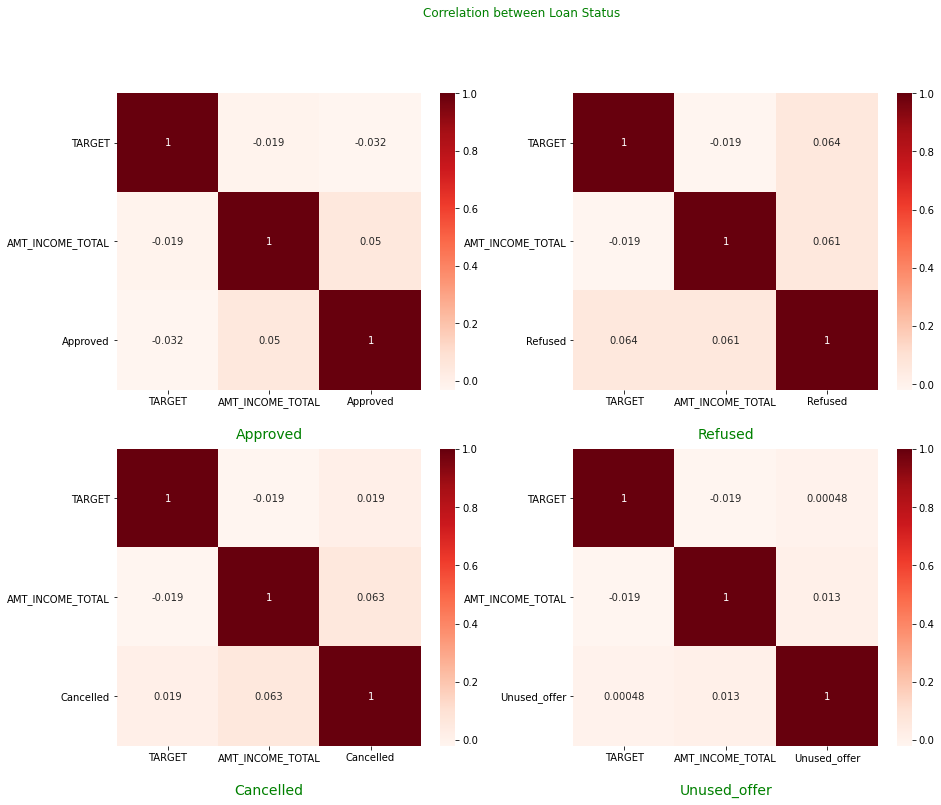

In [84]:
plt.figure(figsize= [15,12])
plt.suptitle('Correlation between Loan Status',fontdict={'fontsize': 20,'fontweight' : 10, 'color': 'Green'})
plt.subplot(2,2,1)
sns.heatmap(result[['TARGET','AMT_INCOME_TOTAL','Approved']].corr(),annot = True,cmap='Reds')
plt.xlabel("\nApproved", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(2,2,2)
sns.heatmap(result[['TARGET','AMT_INCOME_TOTAL','Refused']].corr(),annot = True,cmap='Reds')
plt.xlabel("\nRefused", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(2,2,3)
sns.heatmap(result[['TARGET','AMT_INCOME_TOTAL','Cancelled']].corr(),annot = True,cmap='Reds')
plt.xlabel("\nCancelled", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(2,2,4)
sns.heatmap(result[['TARGET','AMT_INCOME_TOTAL','Unused_offer']].corr(),annot = True,cmap='Reds')
plt.xlabel("\nUnused_offer", fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Green'})
plt.show()